# finding the class an image belongs to

In this program images are first flattened and their histograms are calculated. These data are converted to 
a dataset to impliment KNN. The accuracy score is then compared to get the desired output 

In [1]:
import matplotlib.pyplot as plt 
import cv2 
import numpy as np

In [2]:
import os
import pandas as pd

# histogram calculation function

In [3]:
def histcal(temp):
    bins = (8,8,8)
    histg = cv2.calcHist([temp],[0,1,2],None,bins,[0,256, 0, 256, 0, 256])
    cv2.normalize(histg, histg, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    return histg.flatten()

# Creating a dataset

In [4]:
filenames = os.listdir("/home/zahidfaiz/zahiddocuments/VR/assignment1/kNN_dataset/")
categories = []
image = []
hist = []
bins=(8, 8, 8)
size = (256,256)
for filename in filenames:
    temp = cv2.imread("/home/zahidfaiz/zahiddocuments/VR/assignment1/kNN_dataset/" + filename)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
    temp = cv2.resize(temp , size)
    histg = histcal(temp)
    hist.append(histg)
    category = filename.split('.')[0]
    if category == 'portrait':
        categories.append(1)
        image.append(temp.flatten())    
    if category == 'landscape':
        categories.append(0)
        image.append(temp.flatten())    
    if category == 'sky':
        categories.append(2)
        image.append(temp.flatten())    
df = pd.DataFrame({
    'filename': filenames,
    'array' : image,
    'histogram' : hist,
    'category': categories
})


In [5]:
df.head(10)

filename                                              array  \
0  landscape.004.jpeg  [191, 208, 218, 193, 210, 218, 193, 210, 218, ...   
1   landscape.003.jpg  [52, 126, 165, 21, 105, 142, 42, 121, 164, 55,...   
2   landscape.009.jpg  [68, 138, 150, 65, 135, 147, 67, 137, 149, 71,...   
3  landscape.008.jpeg  [132, 156, 180, 133, 157, 181, 134, 158, 182, ...   
4        sky.001.jpeg  [12, 15, 24, 5, 8, 18, 6, 9, 18, 7, 7, 16, 16,...   
5         sky.011.jpg  [67, 67, 77, 67, 67, 77, 67, 67, 77, 68, 68, 7...   
6         sky.013.jpg  [0, 1, 17, 0, 1, 13, 1, 0, 15, 0, 8, 34, 3, 0,...   
7   landscape.017.jpg  [199, 208, 231, 188, 204, 230, 158, 187, 231, ...   
8   portrait.004.jpeg  [76, 58, 70, 78, 60, 72, 78, 60, 72, 78, 60, 7...   
9  landscape.007.jpeg  [104, 125, 130, 92, 114, 119, 75, 96, 101, 55,...   

                                           histogram  category  
0  [0.07981145, 0.0011378414, 0.0, 0.0, 0.0, 0.0,...         0  
1  [0.7709392, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...         0  
2  [0.007979573, 0.003191829, 0.0, 0.0, 0.0, 0.0,...         0  
3  [1.0, 0.014787724, 0.0, 0.0, 0.0, 0.0, 0.0, 0....         0  
4  [1.0, 0.26896685, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...         2  
5  [1.0, 0.033699665, 0.0, 0.0, 0.0, 0.0, 0.0, 0....         2  
6  [1.0, 0.3729258, 0.10656445, 6.637462e-05, 0.0...         2  
7  [0.43432796, 0.032069158, 0.00041829338, 0.0, ...         0  
8  [0.09843546, 0.36126584, 0.00029631384, 0.0, 0...         1  
9  [1.0, 0.020059828, 0.007390463, 0.0001759634, ...         0

In [6]:
df.to_csv('multiclass.csv')

# Applying the KNN for Histograms

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
y = df['category']
(X_train, X_test, y_train, y_test) = train_test_split(hist, y, test_size=0.113, random_state=10)
knn_h = KNeighborsClassifier(n_neighbors=3, weights='distance',p=2, n_jobs= -1)
knn_h.fit(X_train,y_train)
pred = knn_h.predict(X_test)
print(pred)
match_hist = df[df['category'] ==pred[0]]

[2 0 0 2 1 1]


# Calculating the Score using confusion matrix

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)

Confusion Matrix:
[[2 0 0]
 [0 1 0]
 [0 1 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.83      0.89      0.82         6
weighted avg       0.92      0.83      0.84         6

Accuracy: 0.8333333333333334


# Image retrival for thr first image from the test set

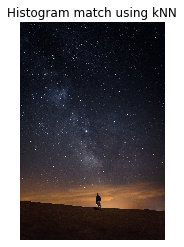

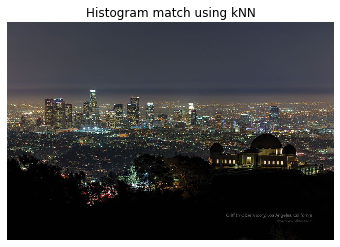

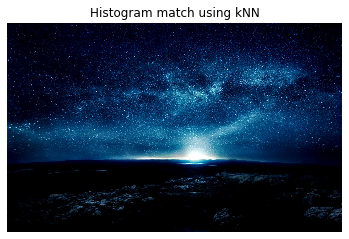

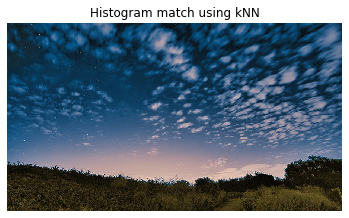

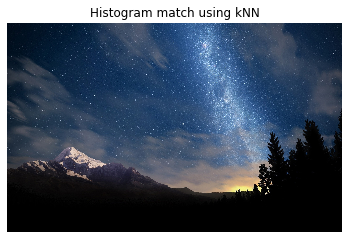

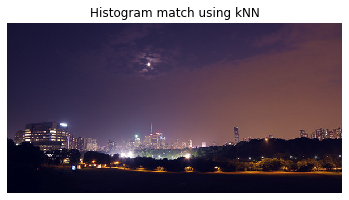

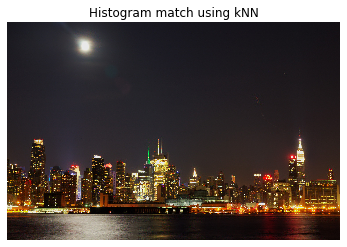

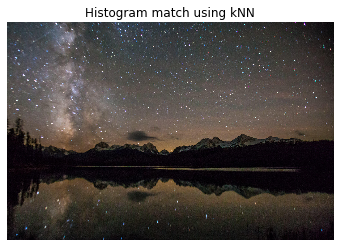

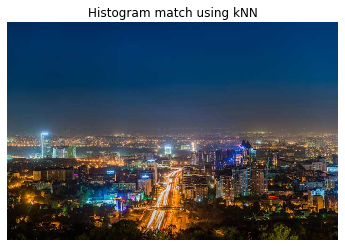

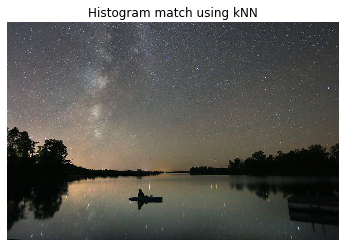

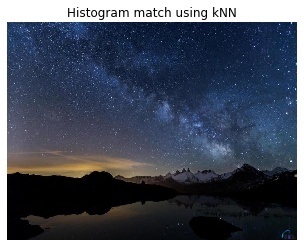

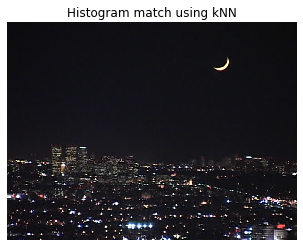

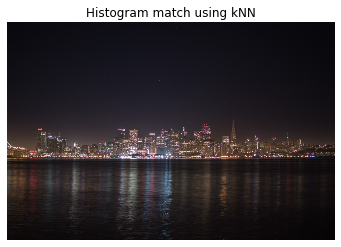

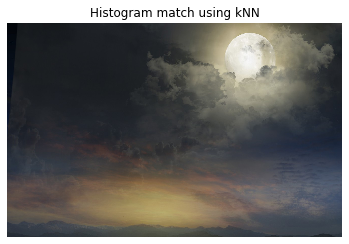

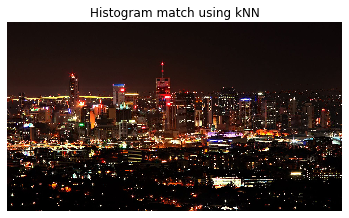

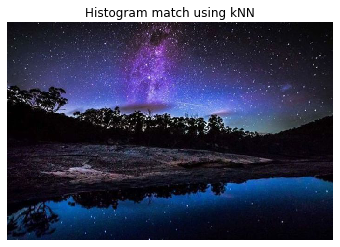

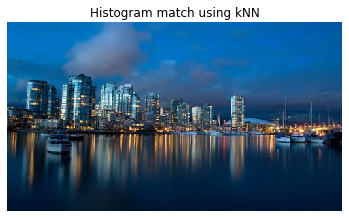

In [10]:
file_list = list(match_hist['filename'])
for filename in file_list:
    temp = cv2.imread("/home/zahidfaiz/zahiddocuments/VR/assignment1/kNN_dataset/" + filename)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
    plt.imshow(temp)
    plt.title("Histogram match using kNN")
    plt.axis('off')
    plt.show()


# Applying the KNN for the flattened image array

In [30]:
(X_train, X_test, y_train, y_test) = train_test_split(image, y, test_size=0.113,random_state=12)
knn_i = KNeighborsClassifier(n_neighbors=5, weights='distance',p=2, n_jobs= -1)
knn_i.fit(X_train,y_train)
pred = knn_i.predict(X_test)
print(pred)
match_img = df[df['category'] ==pred[0]]

[0 1 2 0 1 2]


# Confusion matrix give really good results 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,pred)
print("Accuracy:",result2)

Confusion Matrix:
[[2 0 0]
 [0 2 0]
 [0 0 2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Accuracy: 1.0


# Image retrival using a first image of test set 

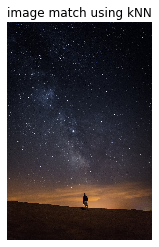

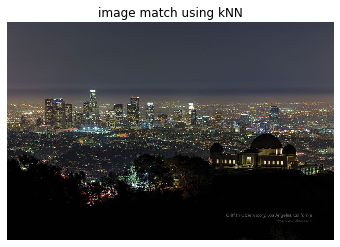

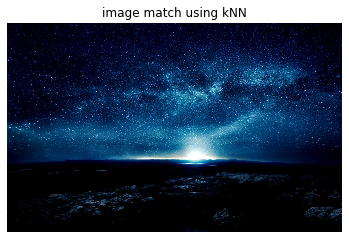

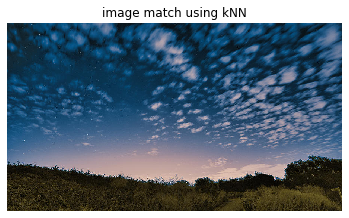

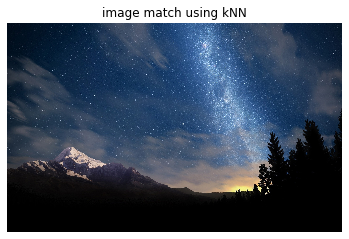

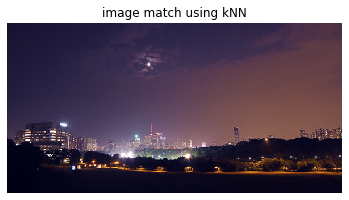

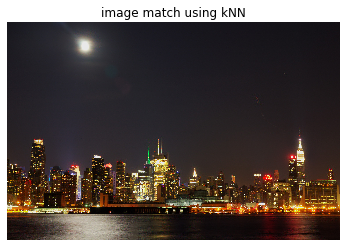

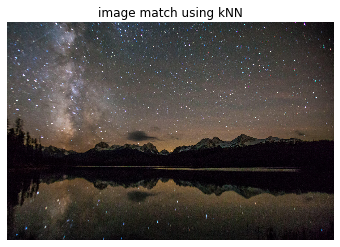

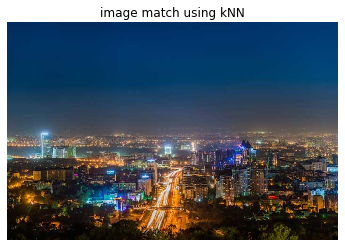

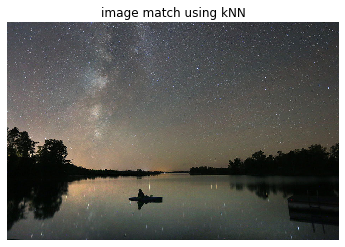

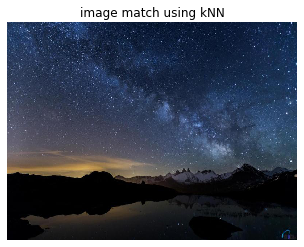

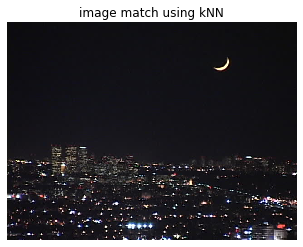

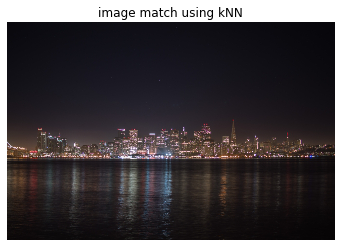

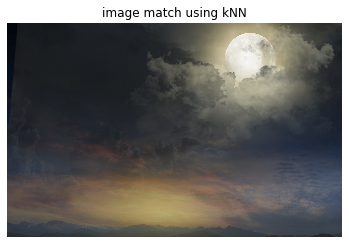

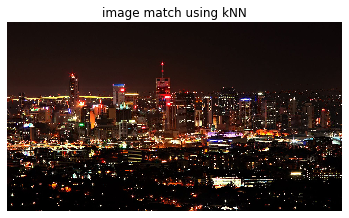

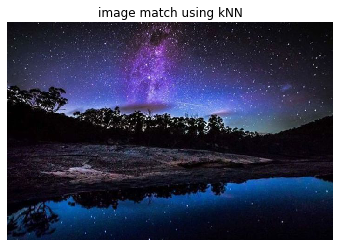

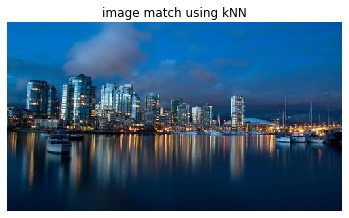

In [13]:
file_list = list(match_img['filename'])
for filename in file_list:
    temp = cv2.imread("/home/zahidfaiz/zahiddocuments/VR/assignment1/kNN_dataset/" + filename)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
    plt.imshow(temp)
    plt.axis('off')
    plt.title("image match using kNN")
    plt.show()

# Testinng the Image KNN using the some random test image 

In [14]:
filename = "sky_test.jpg"
test = cv2.imread(filename)
test = cv2.cvtColor(test,cv2.COLOR_BGR2RGB)
test = cv2.resize(test , size)
histg = histcal(test)
test = test.flatten()
test = [test]
pred = knn_i.predict(test)
print(pred)
match_hist = df[df['category'] ==pred[0]]

[2]


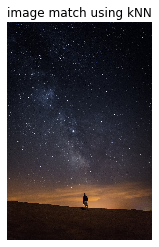

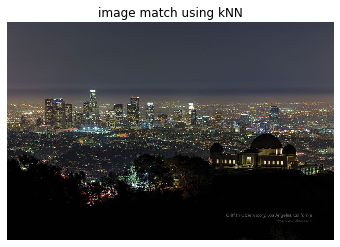

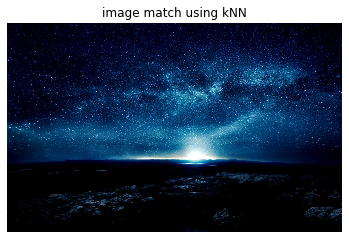

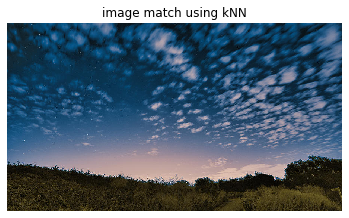

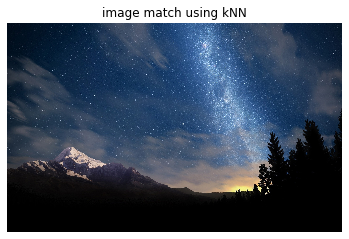

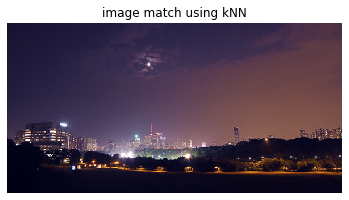

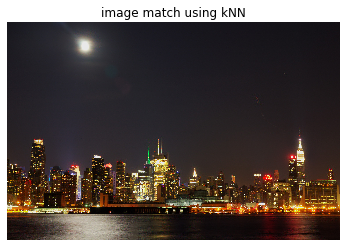

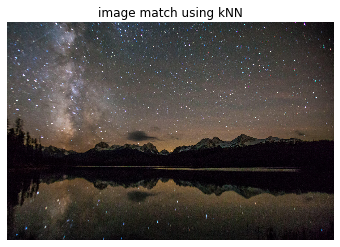

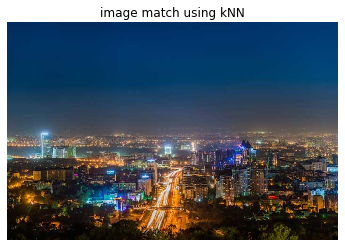

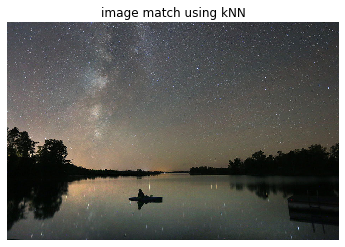

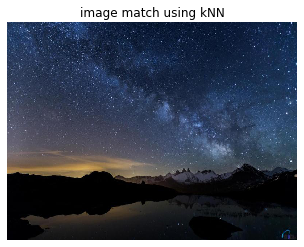

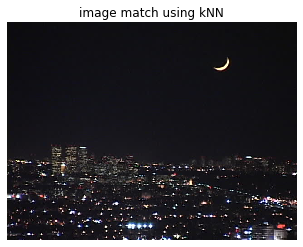

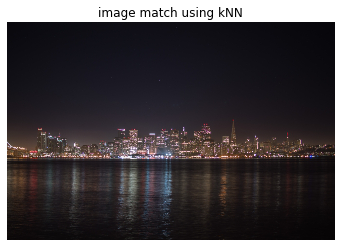

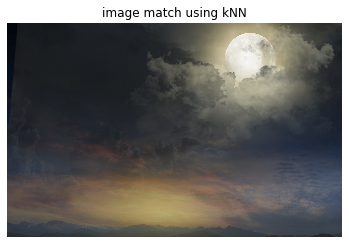

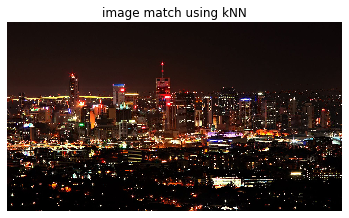

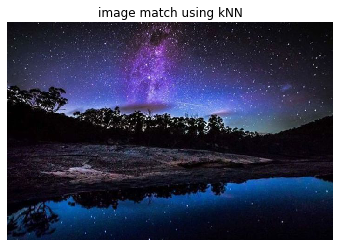

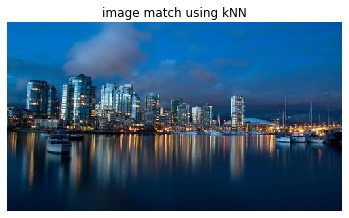

In [15]:
file_list = list(match_hist['filename'])
for filename in file_list:
    temp = cv2.imread("/home/zahidfaiz/zahiddocuments/VR/assignment1/kNN_dataset/" + filename)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2RGB)
    plt.imshow(temp)
    plt.axis('off')
    plt.title("image match using kNN")
    plt.show()